In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000868671"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000868671
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,GLACIER BANCORP INC
Ticker,GBCI


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,1.0,1.256000e+01,NaN,12.56,12.56,12.56,12.56,1.256000e+01
interest income,52.0,7.660723e+07,1.897714e+07,31608000.00,68649000.00,74253500.00,83503500.00,1.261160e+08
net income,53.0,2.149602e+07,1.265675e+07,-19048000.00,13222000.00,18981000.00,29335000.00,4.959900e+07
net interest income,53.0,6.437358e+07,2.120842e+07,21378000.00,53108000.00,60378000.00,75996000.00,1.158740e+08
provision for loan losses,53.0,6.967113e+06,1.013700e+07,0.00,1078000.00,1907000.00,8675000.00,4.705000e+07


# Plots

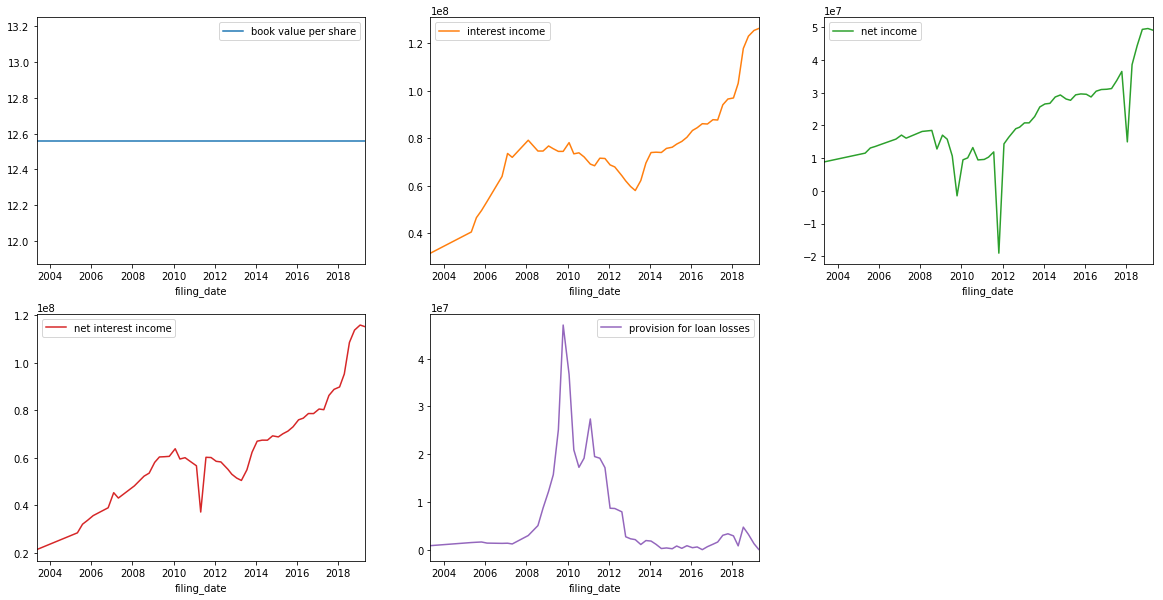

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000868671 book value per share       2003Q2 to 2019Q1: 64 periods  missing   
           interest income             2003Q2 to 2004Q4: 7 periods  missing   
           interest income             2006Q1 to 2006Q2: 2 periods  missing   
           interest income             2007Q2 to 2007Q3: 2 periods  missing   
           interest income                                  2008Q1  missing   
           interest income                                  2008Q3  missing   
           net income                  2003Q2 to 2004Q4: 7 periods  missing   
           net income                  2006Q1 to 2006Q2: 2 periods  missing   
           net income                  2007Q2 to 2007Q3: 2 periods  missing   
           net income                                       2008Q1  missing   
           net interest income         2003Q2 to 2004Q4: 7 periods  missing   
           net interest income         2006Q1 to 2006Q2: 2 periods  missing   
           net interest income         2007Q2 to 2007Q3: 2 periods  missing   
           net interest income                              2008Q1  missing   
           provision for loan losses   2003Q2 to 2004Q4: 7 periods  missing   
           provision for loan losses   2006Q1 to 2006Q2: 2 periods  missing   
           provision for loan losses   2007Q2 to 2007Q3: 2 periods  missing   
           provision for loan losses                        2008Q1  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0000868671 book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()